# Logistic Regression

Logistic regression is the classification algorithm which is used to predict the probability of a binary outcome based on a given set of independent variables.

In logistic regression, the model outputs probabilities, which are then used to classify data into one of the two binary classes.

Assumptions:
1. Linearity: The model assumes a linear relationship between the log odds of the dependent variable and the independent variables.
2. No Perfect Separation of classes
3. No Multicollinearity

In this context, we are looking at a problem where logistic regression is used to predict the likelihood of heart disease in a patient based on various independent variables such as age, cholesterol levels, blood pressure, etc. The outcome is binary: either the patient has heart disease (1) or does not have heart disease (0).



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

heart_disease=pd.read_csv('D:\interview\Machine learning\Machine-Learning-Algorithms\Logistic Regression\heart_2022_no_nans.csv')
heart_disease.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [8]:
heart_disease.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [2]:
selected_columns=['AgeCategory', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 
                    'PhysicalActivities', 'SmokerStatus', 'BMI', 
                    'HadHeartAttack', 'HadStroke', 'HadCOPD', 'HadDiabetes']

heart_data=heart_disease[selected_columns]
heart_data

,AgeCategory,Sex,GeneralHealth,PhysicalHealthDays,PhysicalActivities,SmokerStatus,BMI,HadHeartAttack,HadStroke,HadCOPD,HadDiabetes
0,Age 65 to 69,Female,Very good,4.0,Yes,Former smoker,27.99,No,No,No,No
1,Age 70 to 74,Male,Very good,0.0,Yes,Former smoker,30.13,No,No,No,Yes
2,Age 75 to 79,Male,Very good,0.0,No,Former smoker,31.66,No,No,No,No
3,Age 80 or older,Female,Fair,5.0,Yes,Never smoked,31.32,No,No,No,No
4,Age 80 or older,Female,Good,3.0,Yes,Never smoked,33.07,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
246017,Age 60 to 64,Male,Very good,0.0,Yes,Never smoked,32.28,No,No,No,No
246018,Age 25 to 29,Female,Fair,0.0,Yes,Never smoked,24.34,No,No,No,No
246019,Age 65 to 69,Male,Good,0.0,Yes,Never smoked,29.86,No,Yes,No,Yes
246020,Age 50 to 54,Female,Excellent,2.0,Yes,Never smoked,28.66,No,No,No,No


In [12]:
print(heart_data.isnull().sum())

AgeCategory           0
Sex                   0
GeneralHealth         0
PhysicalHealthDays    0
PhysicalActivities    0
SmokerStatus          0
BMI                   0
HadHeartAttack        0
HadStroke             0
HadCOPD               0
HadDiabetes           0
dtype: int64


In [ ]:
print(heart_data.dtypes)

AgeCategory            object
Sex                    object
GeneralHealth          object
PhysicalHealthDays    float64
PhysicalActivities     object
SmokerStatus           object
BMI                   float64
HadHeartAttack         object
HadStroke              object
HadCOPD                object
HadDiabetes            object
dtype: object


We should check if the target variable ('HadHeartAttack') is balanced. Logistic regression can be significantly affected by class imbalance, where one class dominates the other

In [3]:
print(heart_data['HadHeartAttack'].value_counts())

HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64


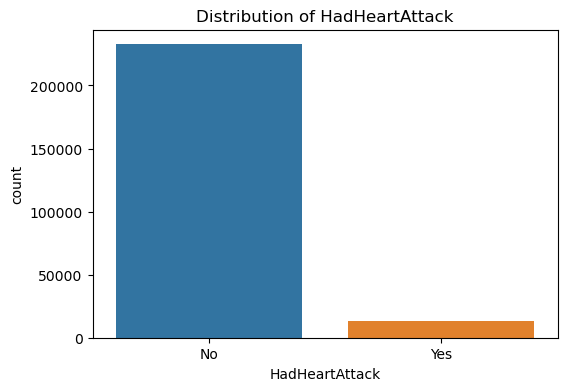

In [8]:
import seaborn as sns

# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='HadHeartAttack', data=heart_data)
plt.title("Distribution of HadHeartAttack")
plt.show()

We can clearly see an imbalance in the target variable, with significantly more instances of one class compared to the other. Before applying logistic regression, it's essential to balance the data. In this analysis, I will use the Synthetic Minority Over-sampling Technique (SMOTE) to address this imbalance.

In [5]:
heart_data.head()

,AgeCategory,Sex,GeneralHealth,PhysicalHealthDays,PhysicalActivities,SmokerStatus,BMI,HadHeartAttack,HadStroke,HadCOPD,HadDiabetes
0,Age 65 to 69,Female,Very good,4.0,Yes,Former smoker,27.99,No,No,No,No
1,Age 70 to 74,Male,Very good,0.0,Yes,Former smoker,30.13,No,No,No,Yes
2,Age 75 to 79,Male,Very good,0.0,No,Former smoker,31.66,No,No,No,No
3,Age 80 or older,Female,Fair,5.0,Yes,Never smoked,31.32,No,No,No,No
4,Age 80 or older,Female,Good,3.0,Yes,Never smoked,33.07,No,No,No,No


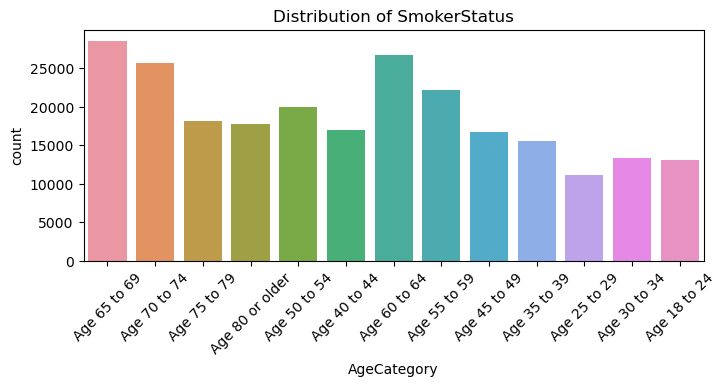

In [12]:
import seaborn as sns
plt.figure(figsize=(8,3))
sns.countplot(x='AgeCategory', data=heart_data)
plt.title(f"Distribution of {column}")
plt.xticks(rotation=45)
plt.show()

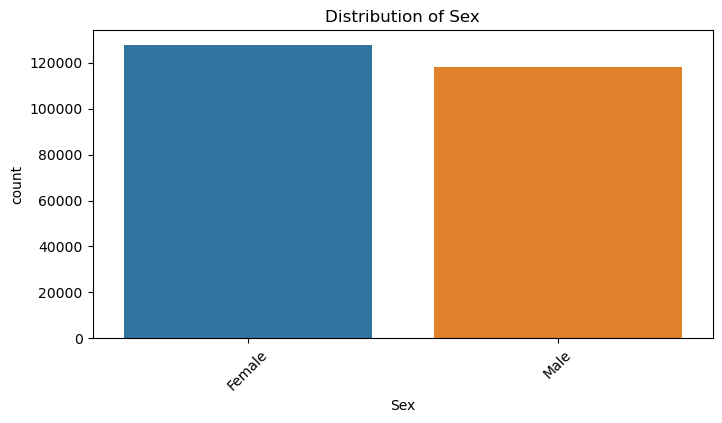

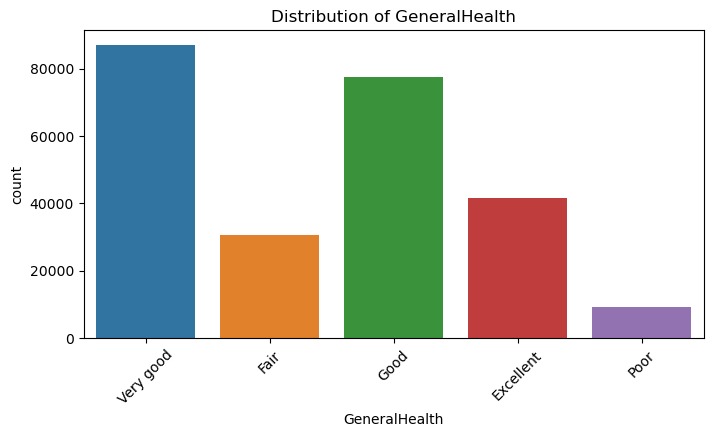

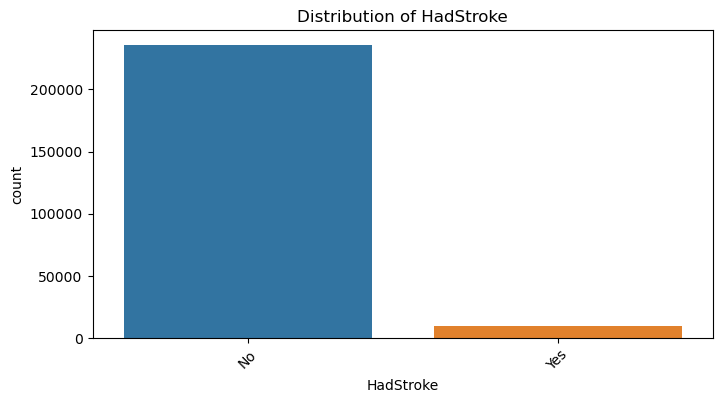

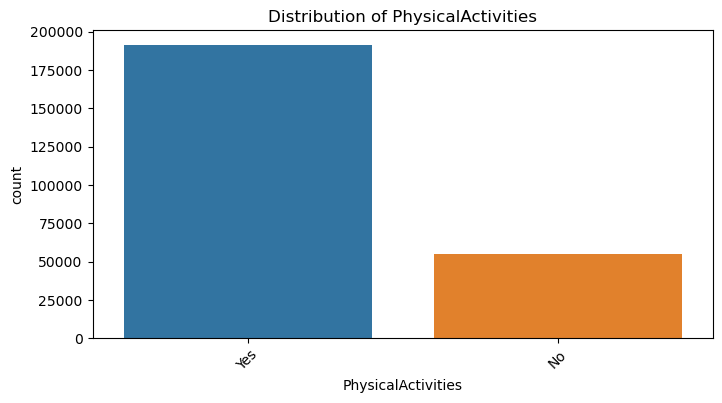

In [19]:
categorical_columns=['Sex', 'GeneralHealth', 'HadStroke', 'PhysicalActivities']

for column in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x=column, data=heart_data)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()


In [18]:
heart_data.SmokerStatus.unique()

array(['Former smoker', 'Never smoked',
       'Current smoker - now smokes every day',
       'Current smoker - now smokes some days'], dtype=object)